In [1]:
#NAME-ABHIJEET KUNDU
#REG NO- 22BDS072
!pip install pandas matplotlib seaborn --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setting visualization style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)


In [2]:
# Loading CSV from URL
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/employee_promotion.csv"
df = pd.read_csv(url)

df.head()


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0.0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0.0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0.0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0.0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0.0,73.0,0


In [3]:
# Dimensions
print("Dataset shape:", df.shape)

# Info about columns
df.info()

# Summary statistics for numeric columns
df.describe()

# Summary statistics for categorical columns
df.describe(include=['object'])


Dataset shape: (54808, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  object 
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won            54807 non-null  float64
 11  avg_training_score    52247 non-null  float64
 12  is_promoted           54808 non-null  object 
dtypes: float64(3), int64(3), object(7)
memory usage: 5.4+ MB


,department,region,education,gender,recruitment_channel,age,is_promoted
count,54808,54808,52399,54808,54808,54808,54808
unique,9,34,4,2,4,42,3
top,Sales & Marketing,region_2,Bachelor's,m,other,30,0
freq,16840,12343,36668,38496,30445,3665,50139


In [5]:
# Missing values count
print("\nMissing Values Before Handling:")
print(df.isnull().sum())

# Filling missing values
df['education'] = df['education'].fillna(df['education'].mode()[0])
df['previous_year_rating'] = df['previous_year_rating'].fillna(df['previous_year_rating'].median())

# Verify missing values again
print("\nMissing Values After Handling:")
print(df.isnull().sum())



Missing Values Before Handling:
employee_id                0
department                 0
region                     0
education                  0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating       0
length_of_service          0
awards_won                 1
avg_training_score      2561
is_promoted                0
dtype: int64

Missing Values After Handling:
employee_id                0
department                 0
region                     0
education                  0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating       0
length_of_service          0
awards_won                 1
avg_training_score      2561
is_promoted                0
dtype: int64


In [6]:
# Removing duplicates
df = df.drop_duplicates()

# Converting categorical columns to 'category' type
cat_cols = df.select_dtypes(include='object').columns
df[cat_cols] = df[cat_cols].astype('category')


df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   employee_id           54808 non-null  int64   
 1   department            54808 non-null  category
 2   region                54808 non-null  category
 3   education             54808 non-null  category
 4   gender                54808 non-null  category
 5   recruitment_channel   54808 non-null  category
 6   no_of_trainings       54808 non-null  int64   
 7   age                   54808 non-null  category
 8   previous_year_rating  54808 non-null  float64 
 9   length_of_service     54808 non-null  int64   
 10  awards_won            54807 non-null  float64 
 11  avg_training_score    52247 non-null  float64 
 12  is_promoted           54808 non-null  category
dtypes: category(7), float64(3), int64(3)
memory usage: 2.9 MB


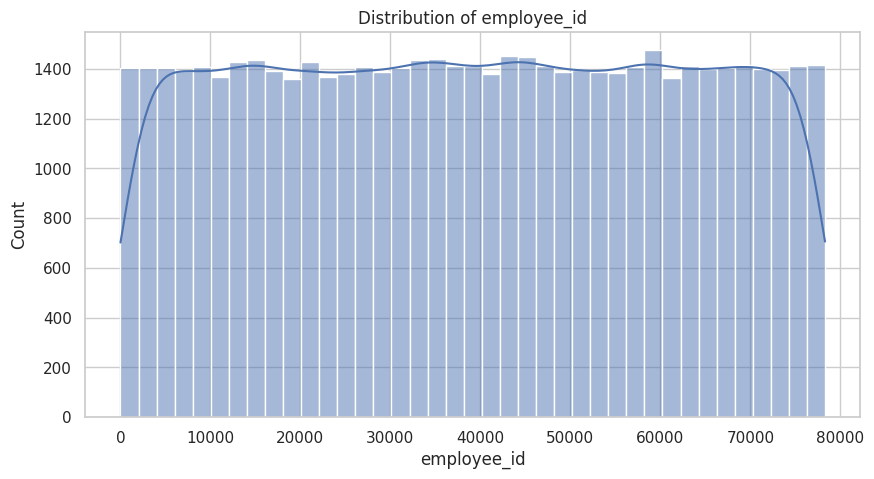

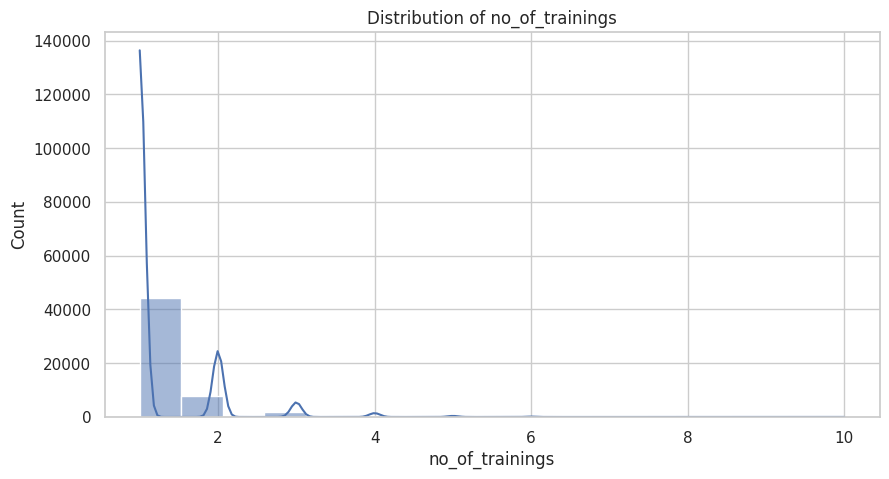

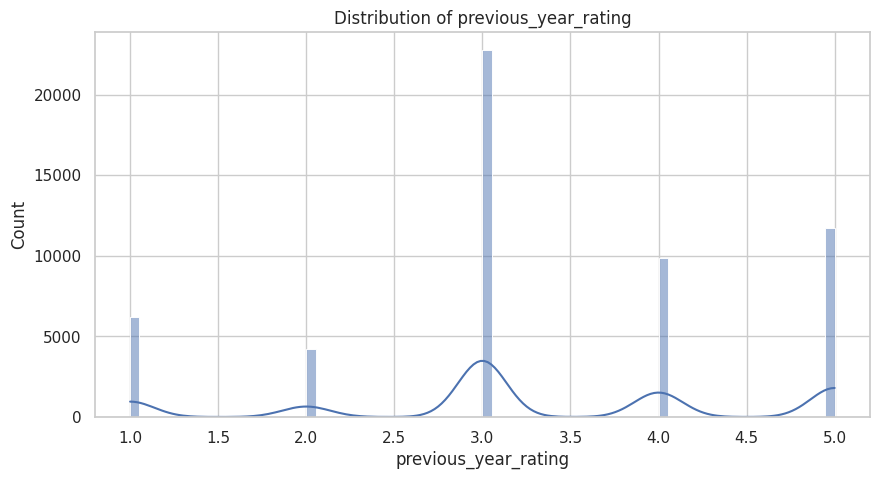

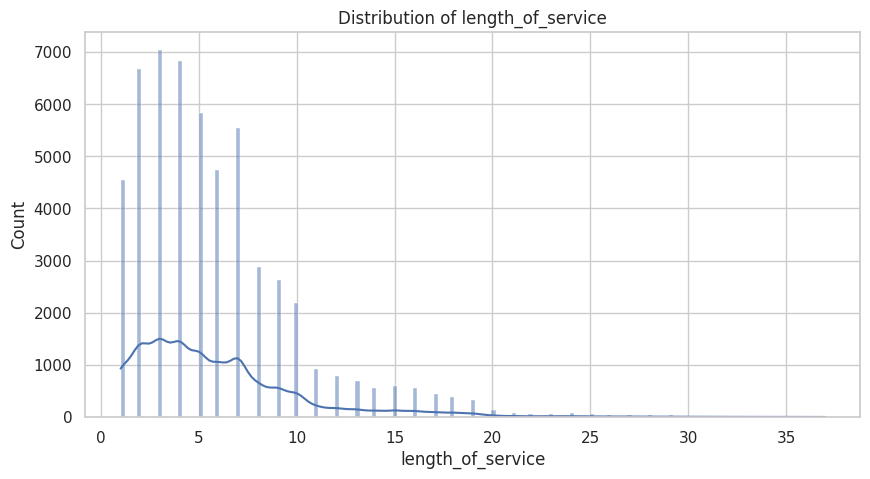

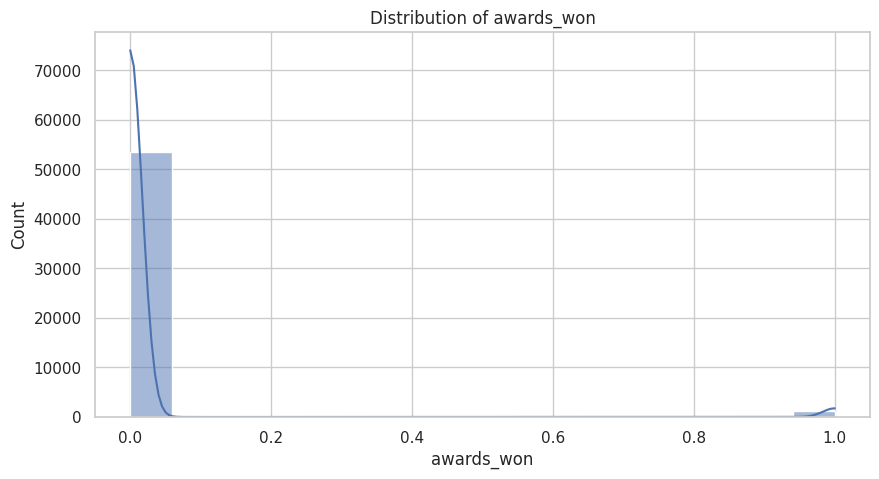

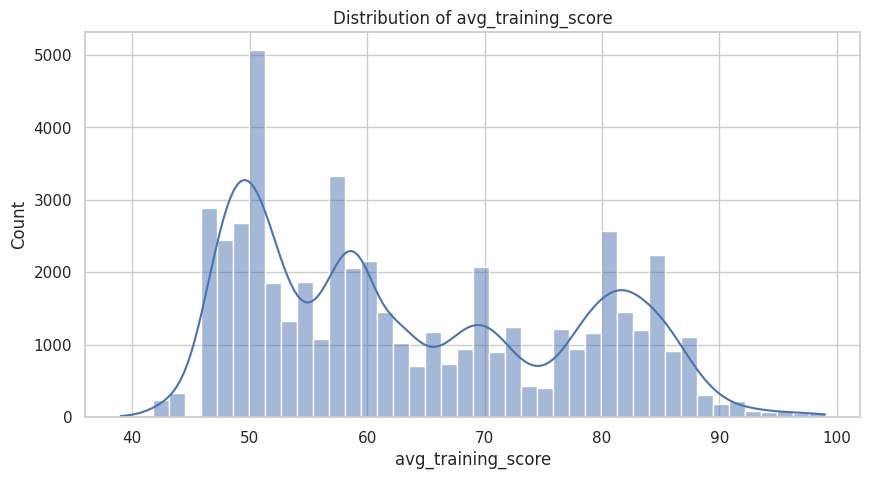

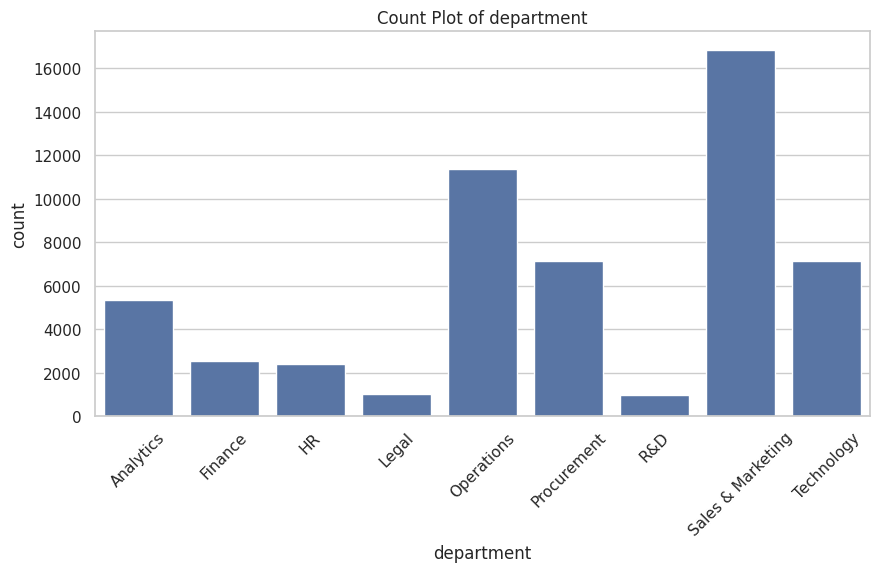

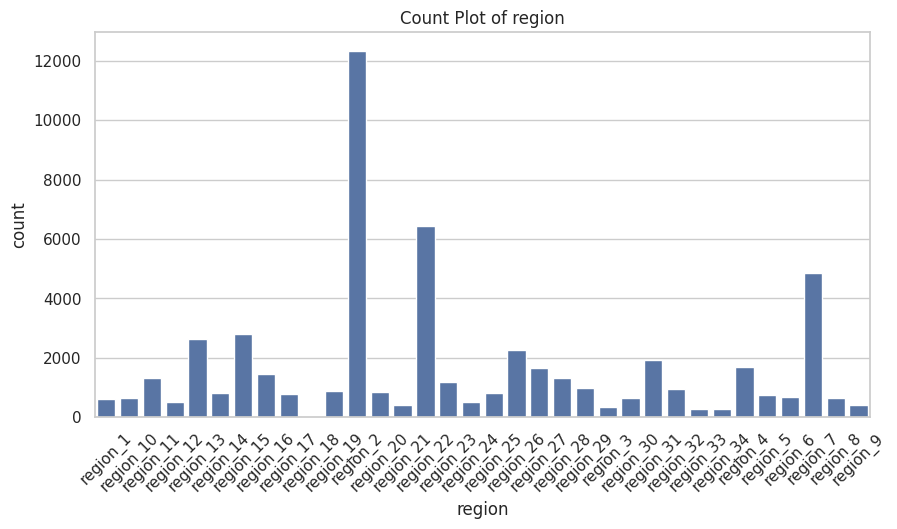

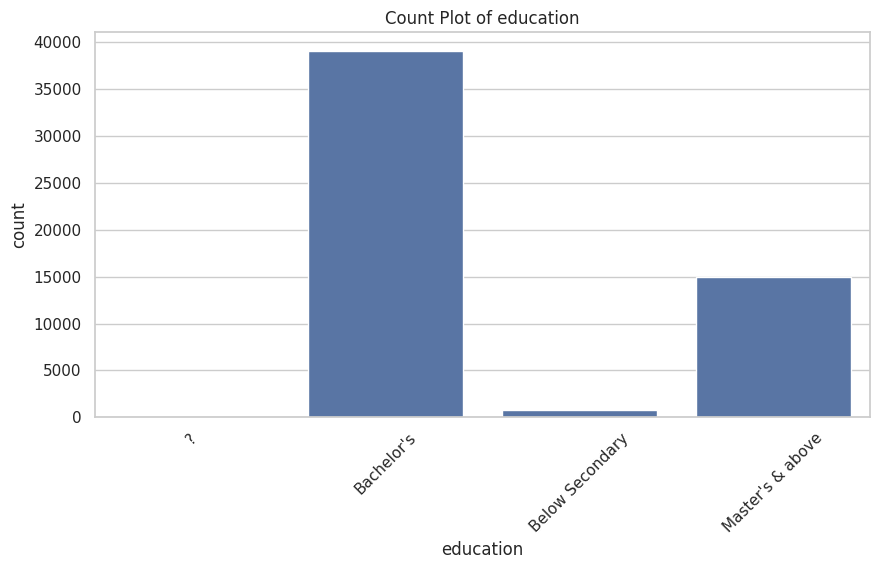

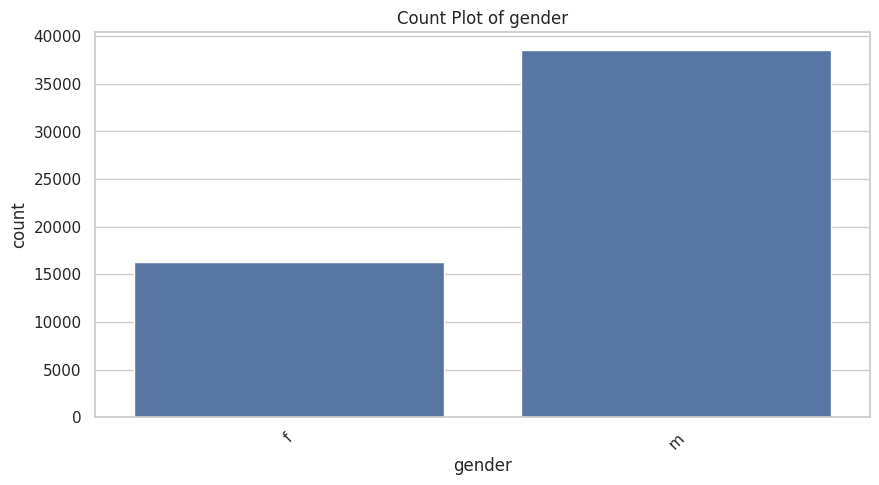

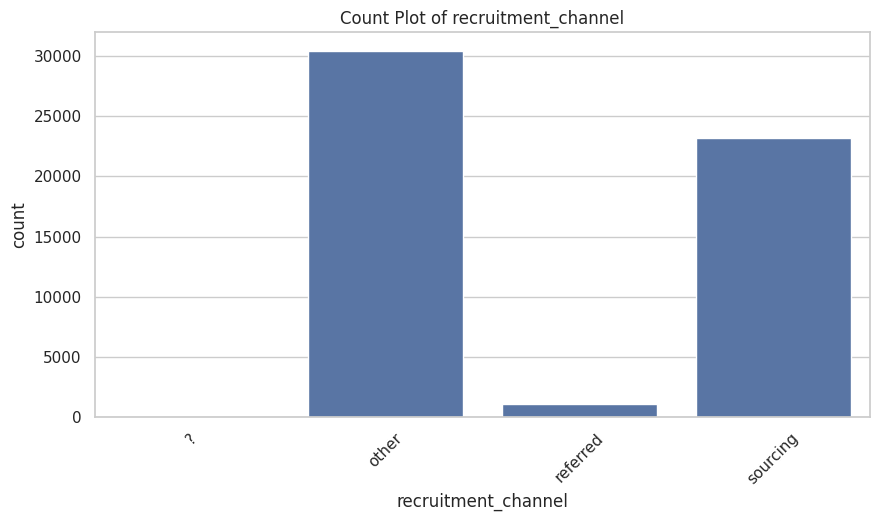

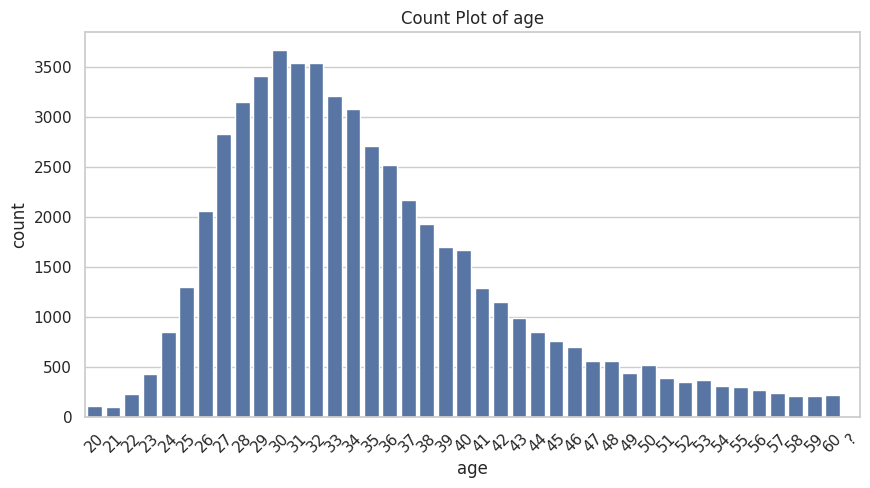

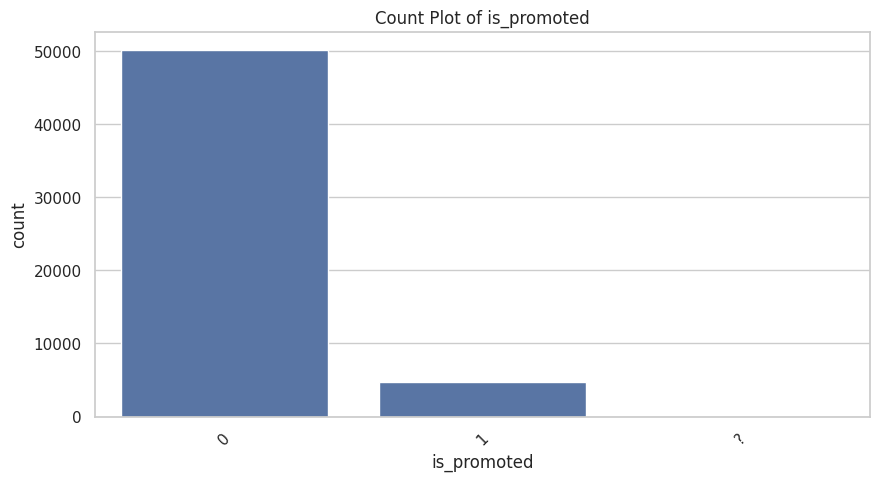

In [7]:
#Univariate Analysis
# Numeric columns distribution
num_cols = df.select_dtypes(include=np.number).columns
for col in num_cols:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

# Categorical columns count plot
for col in cat_cols:
    plt.figure()
    sns.countplot(x=df[col])
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)
    plt.show()


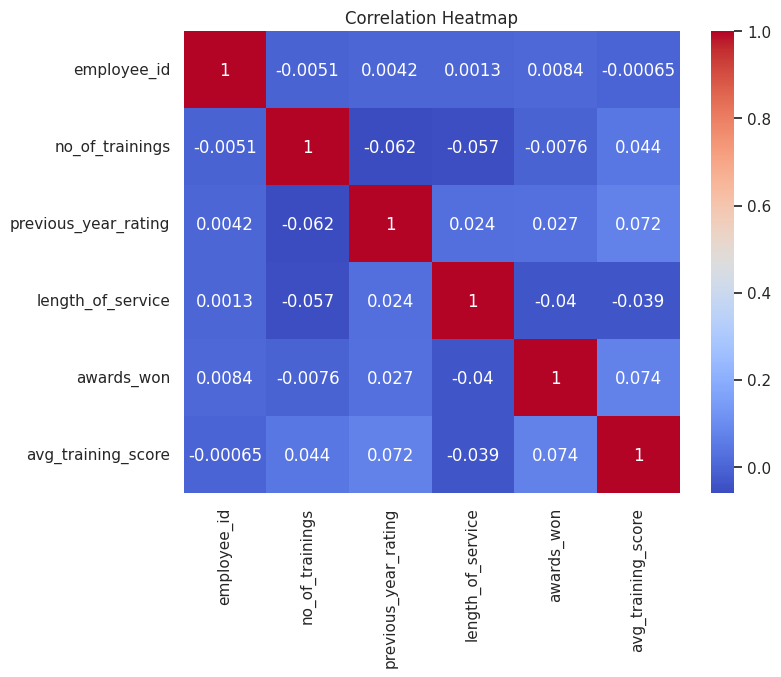

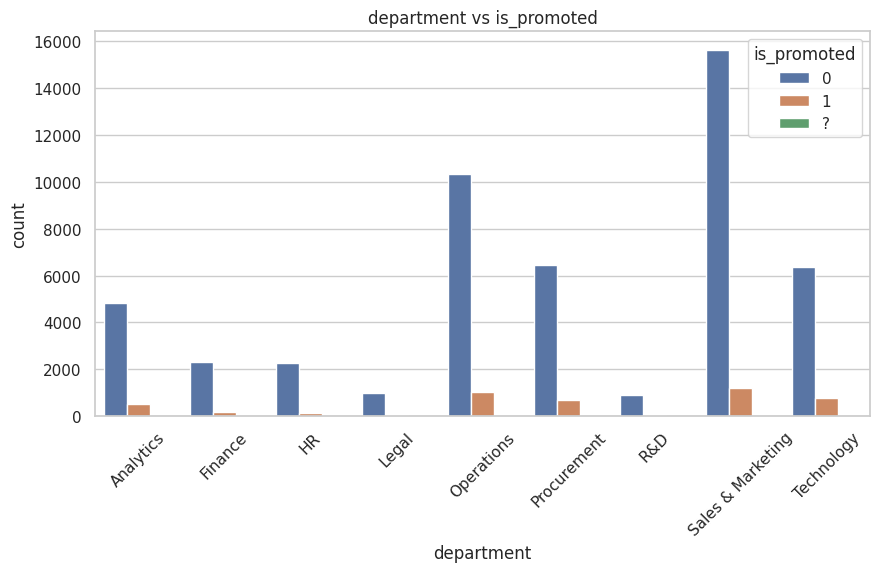

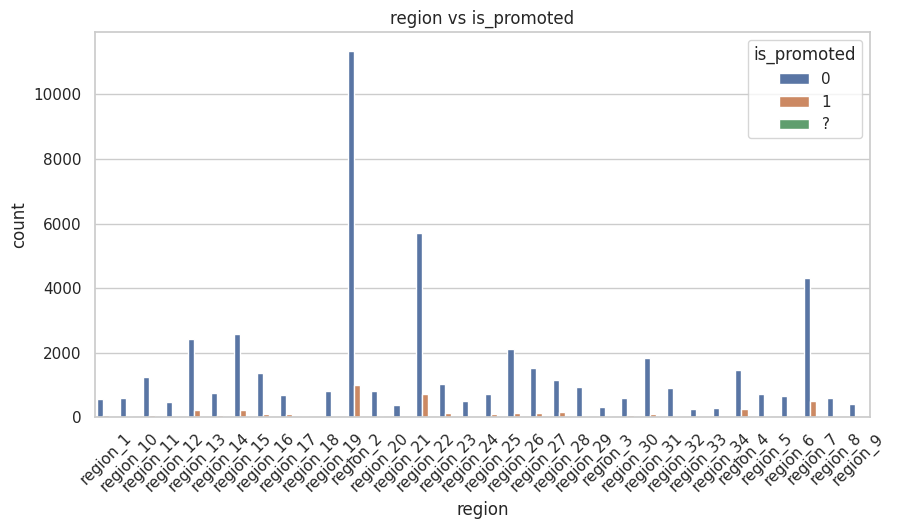

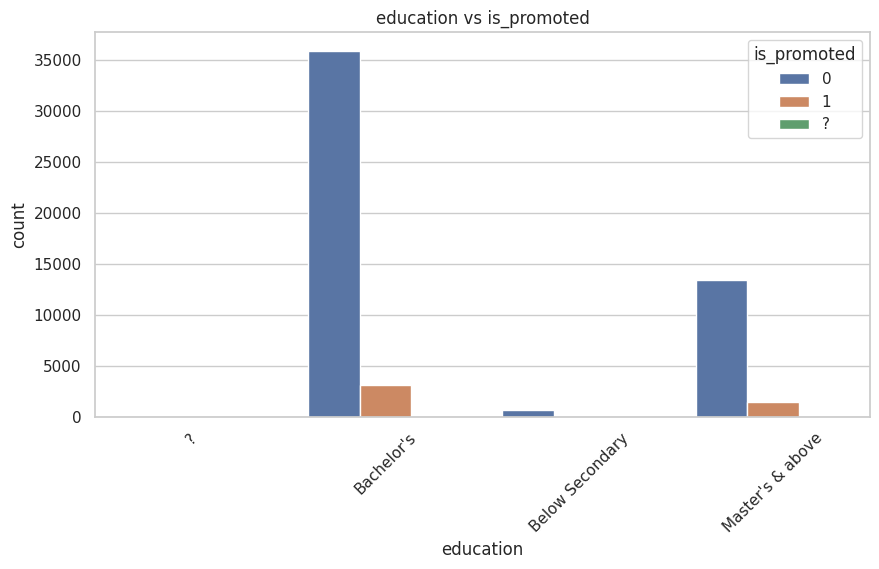

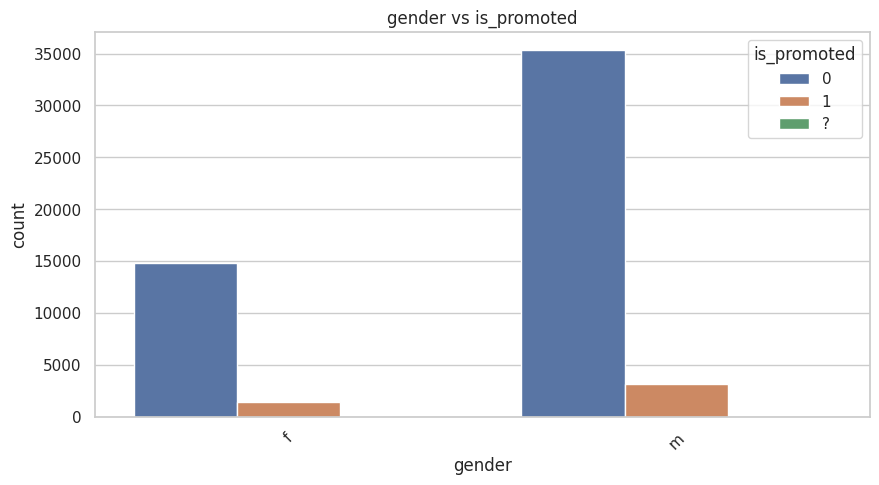

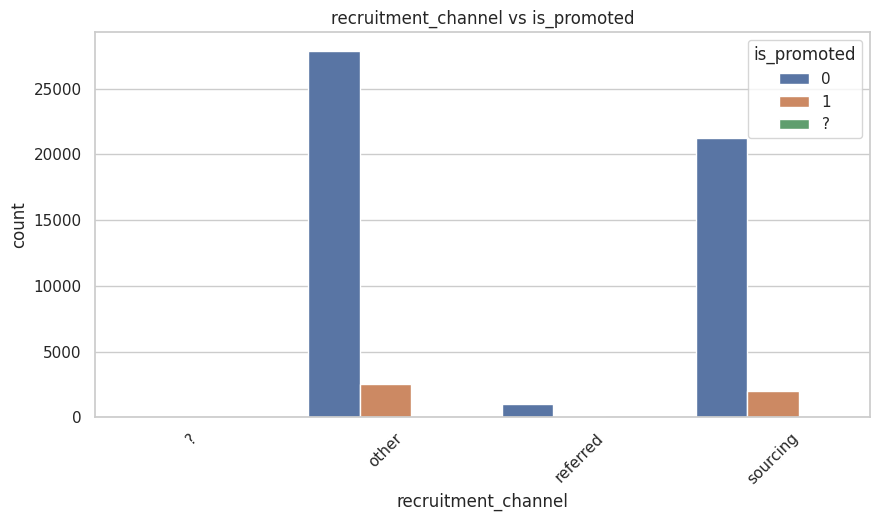

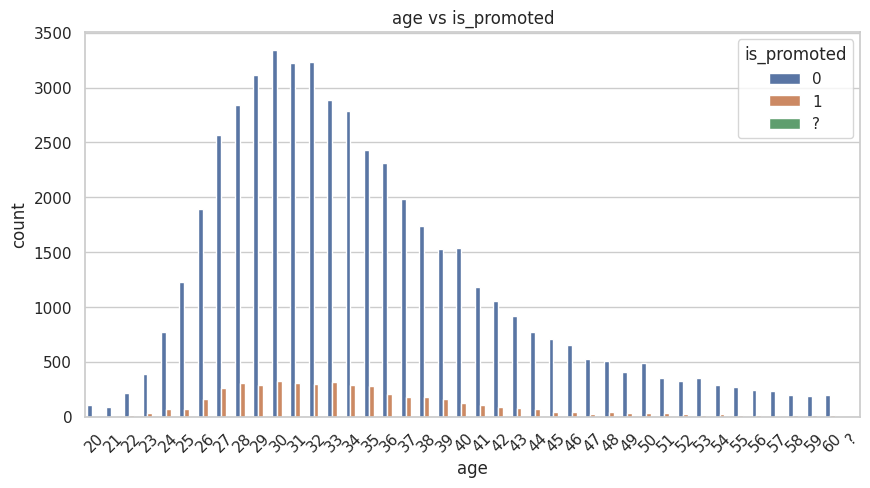

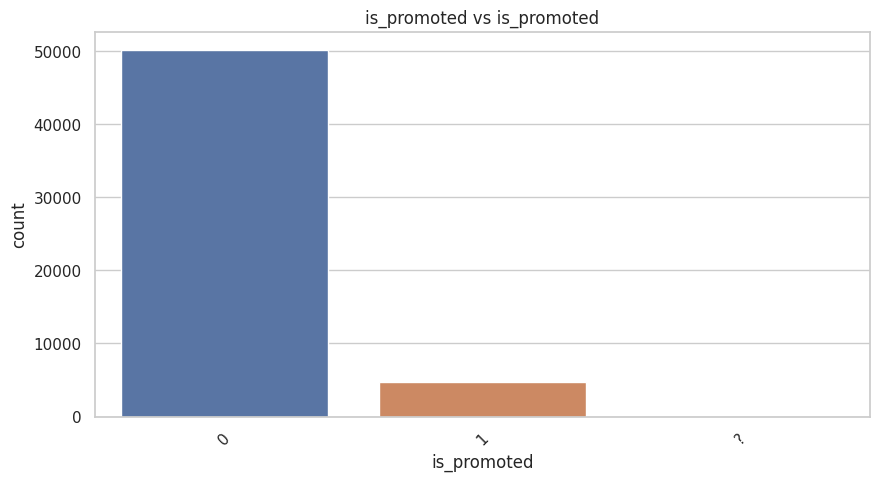

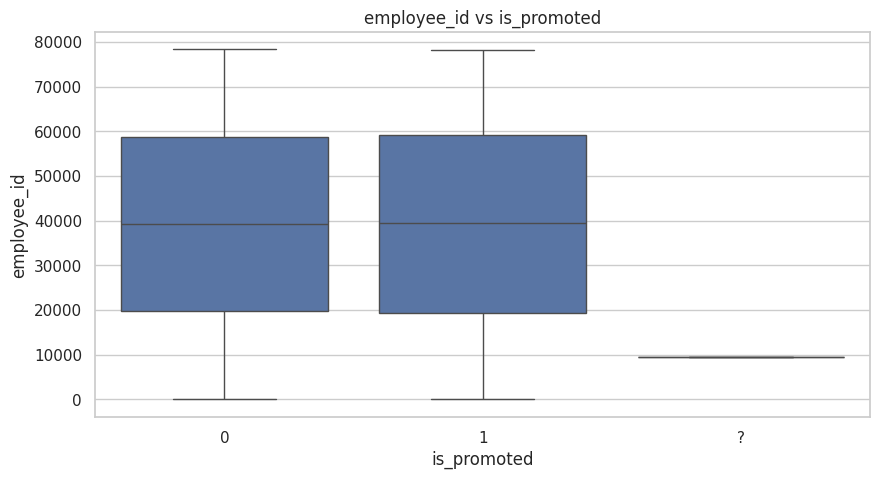

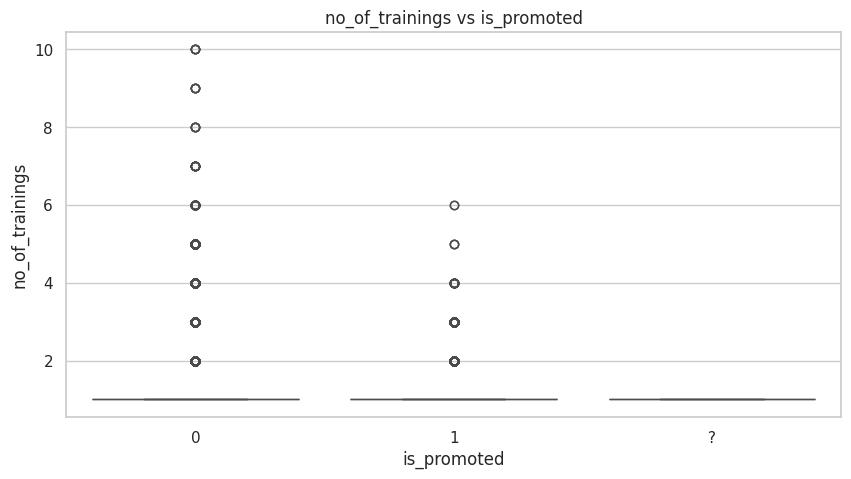

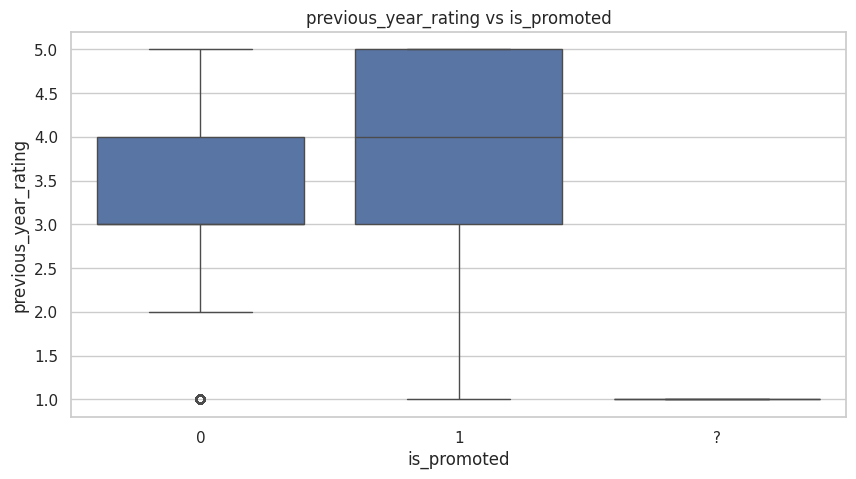

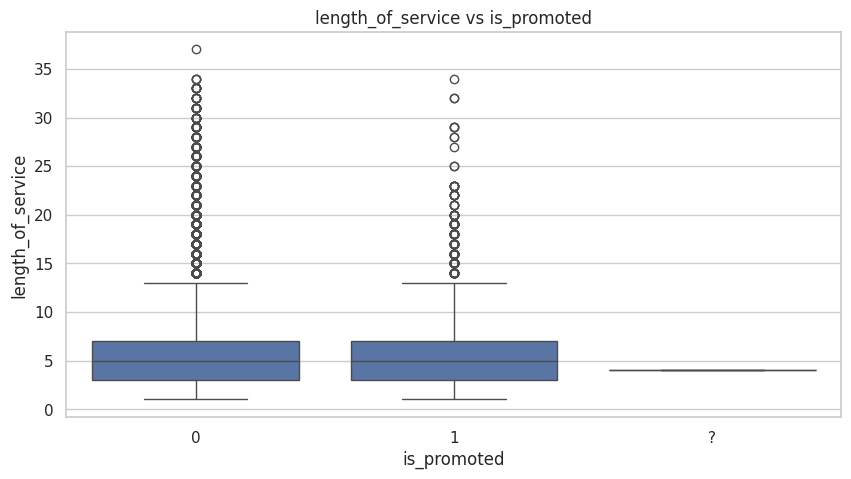

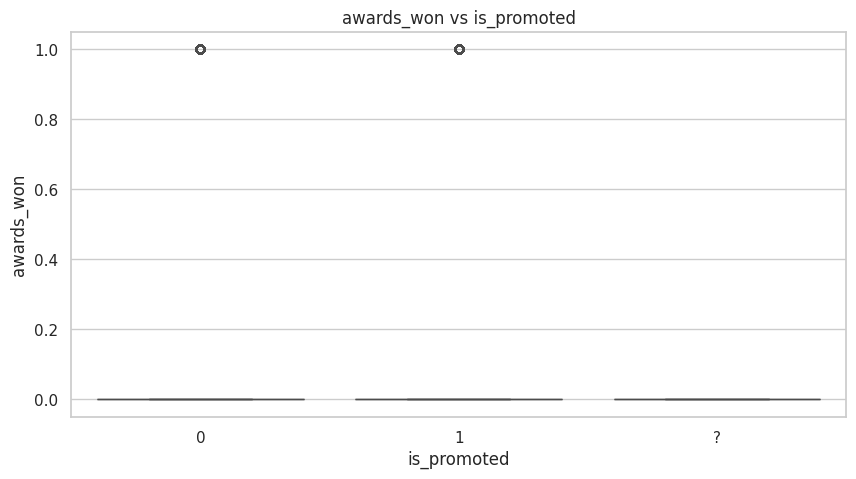

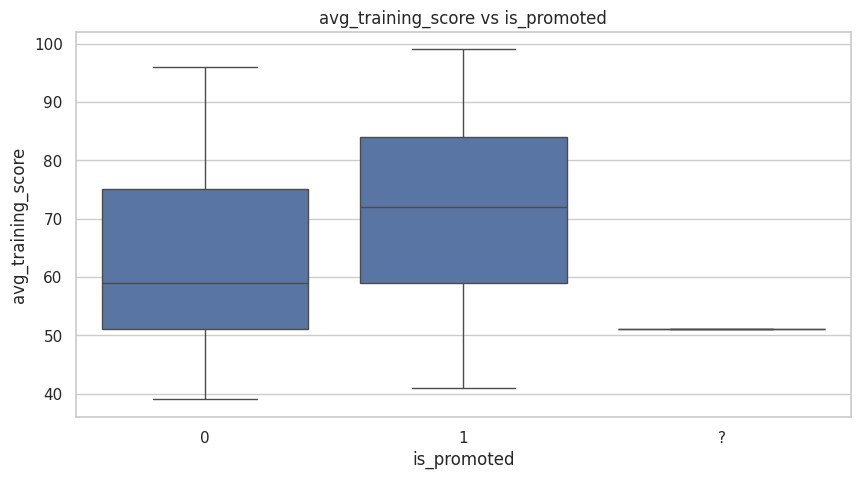

In [8]:
#Bivariate Analysis
# Correlation Heatmap for numeric columns
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Target column
target = 'is_promoted'

# Categorical vs Target
for col in cat_cols:
    plt.figure()
    sns.countplot(x=df[col], hue=df[target])
    plt.title(f"{col} vs {target}")
    plt.xticks(rotation=45)
    plt.show()

# Numeric vs Target
for col in num_cols:
    if col != target:
        plt.figure()
        sns.boxplot(x=df[target], y=df[col])
        plt.title(f"{col} vs {target}")
        plt.show()


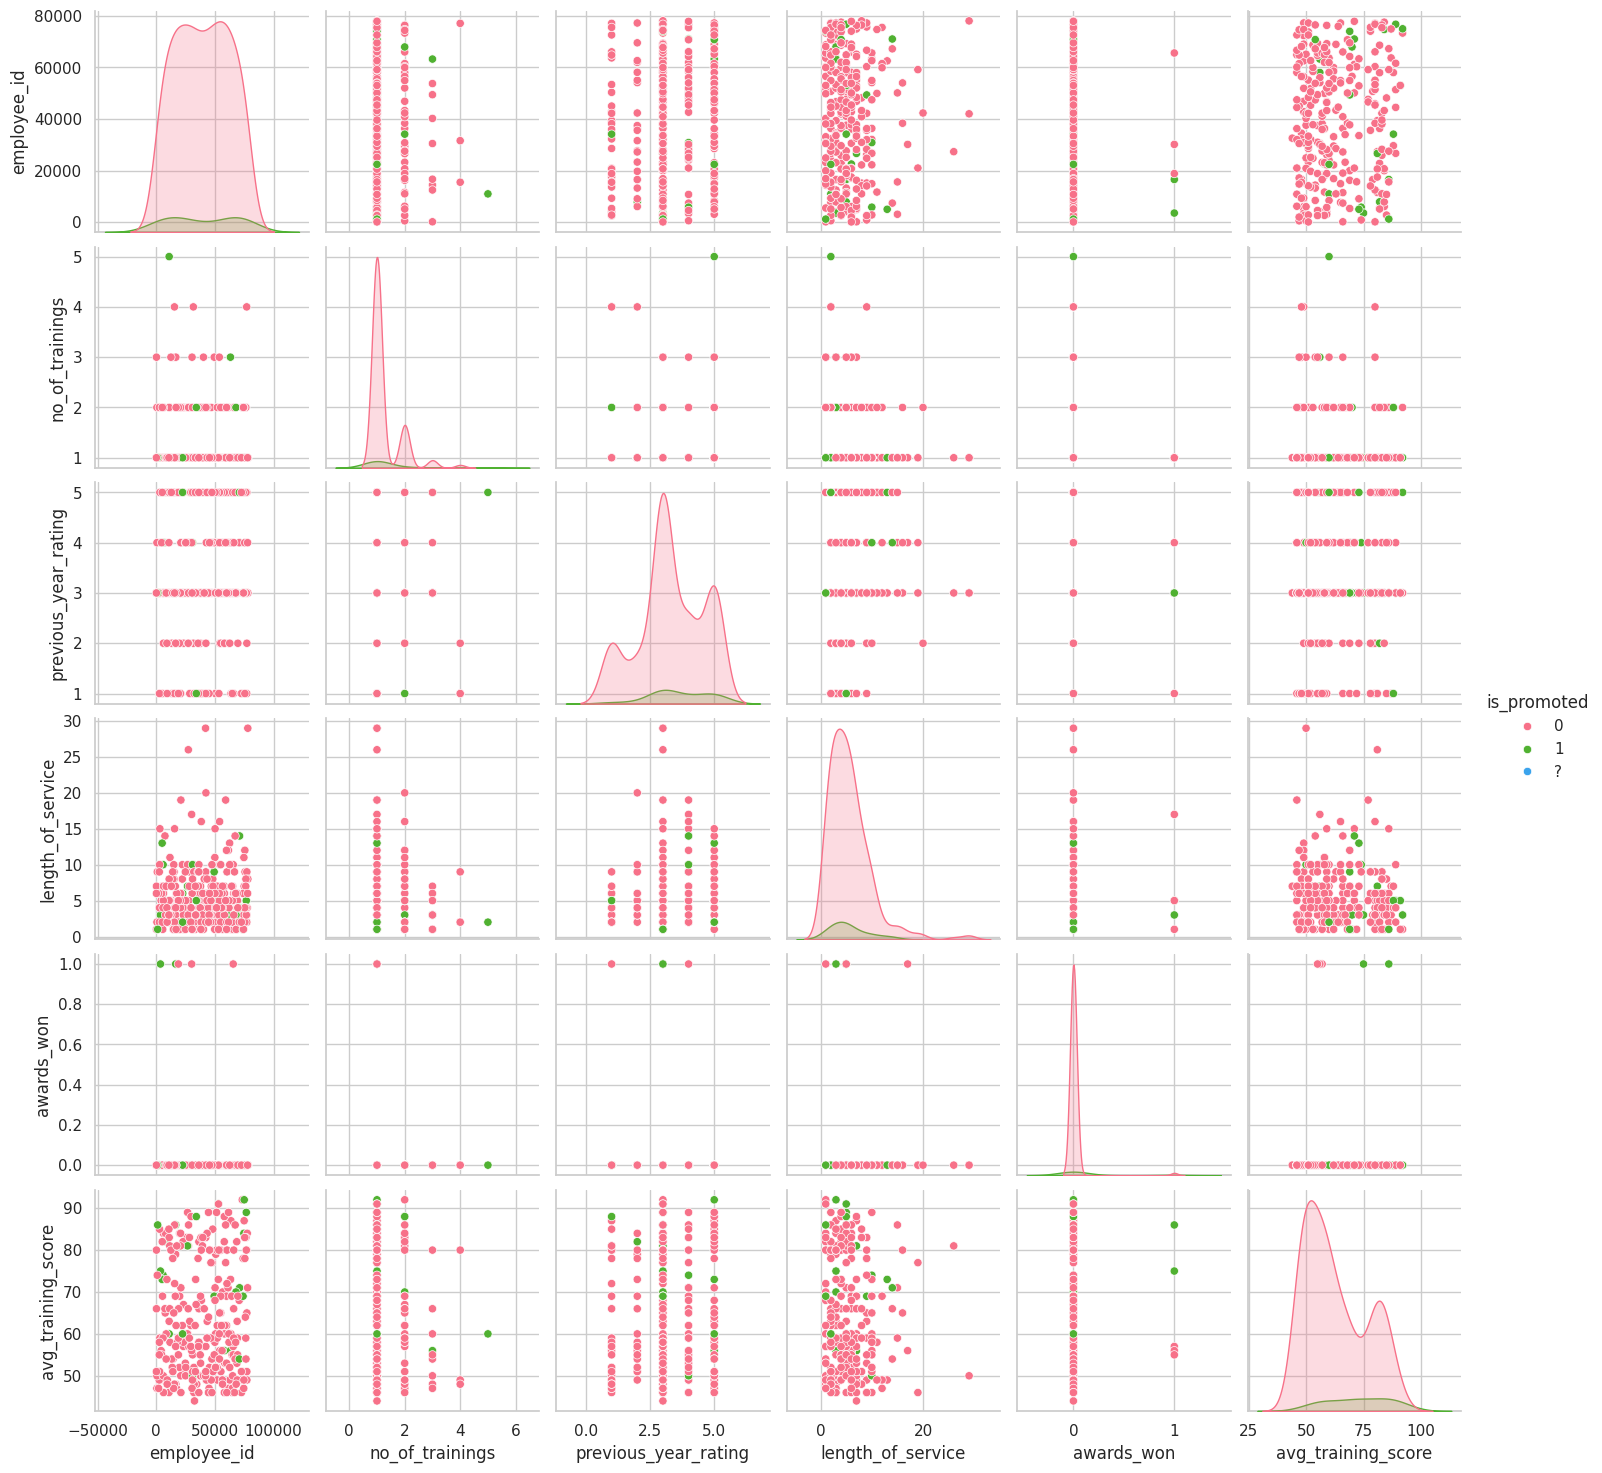

/tmp/ipython-input-2490664938.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['department', target]).size().unstack()


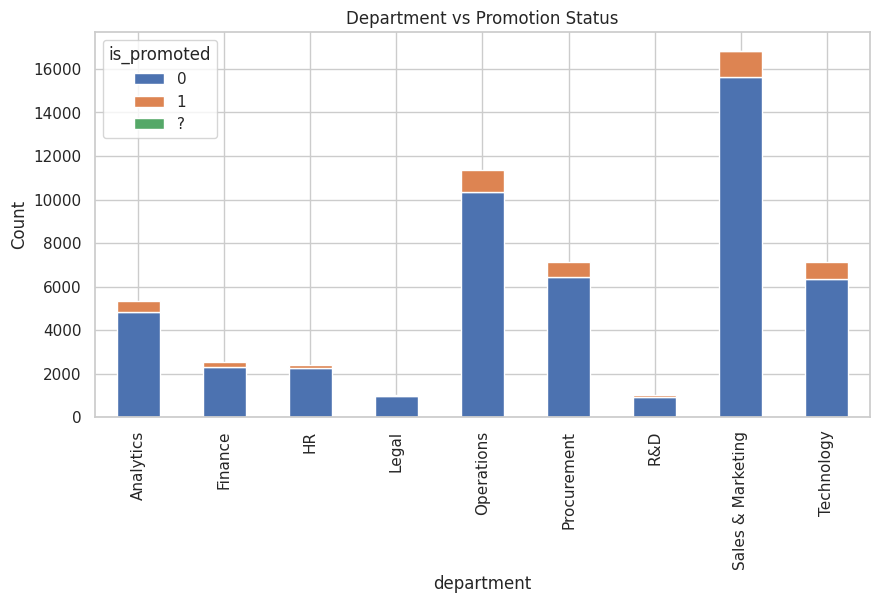

In [9]:
#Multivariate Analysis
# Pairplot for numeric variables (sampled for speed)
sns.pairplot(df.sample(300), vars=num_cols, hue=target, palette='husl')
plt.show()

# Grouped bar chart
grouped = df.groupby(['department', target]).size().unstack()
grouped.plot(kind='bar', stacked=True)
plt.title("Department vs Promotion Status")
plt.ylabel("Count")
plt.show()
